# HW4 (Data analysis in astronomy)
# Building a simple machine learning algorithm
# Have fun!!!

### Your name:
### Deadline 12/11 11:59 pm


### Introduction: in this homework, we are going to use PCA, logistic regression, SVM, decision tree and random forest to build models to predict the numbers shown on the images. 

In [8]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as ss
from sklearn.decomposition import PCA

In [9]:
### 1. We will use 
### training data set https://www.dropbox.com/s/43coge30onvdkl2/Training.fits?dl=0
### test data set https://www.dropbox.com/s/2ex0l7ncwgpbq75/Test.fits?dl=0

In [12]:
training = pf.open('Training.fits')
### training[0].data -> images
### training[1].data -> number labels

In [13]:
X_train = training[0].data
y_train = training[1].data
test = pf.open('Test.fits')

X_test = test[0].data
y_test = test[1].data

### Simple illustration

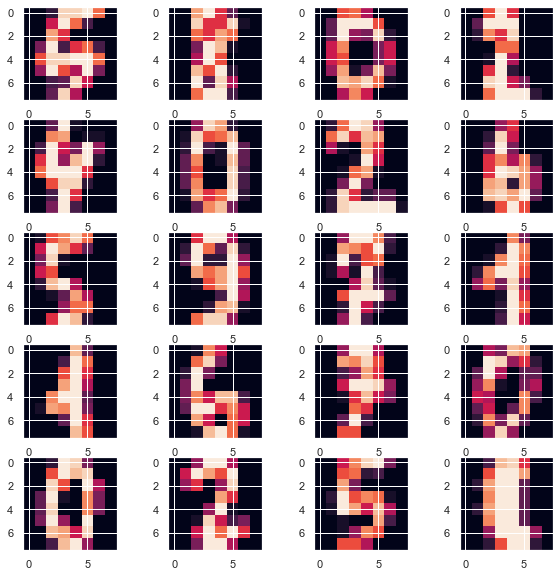

In [14]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.imshow(X_train[i*50].reshape(8,8))

### Two weeks ago, we learned that we can use PCA to obtain the coefficients

In [15]:
pca = PCA(30)
pca.fit(X_train)
coeff = pca.transform(X_train)
print('Total variance explained by the eigenimages:%0.2f' % np.sum(pca.explained_variance_ratio_))

Total variance explained by the eigenimages:0.96


### from the distribution of the coeff [0,1], we noticed that different numbers have different coefficients. This means that we can use the coefficients to distinguish the numbers. 

Text(0, 0.5, 'Coeff 1')

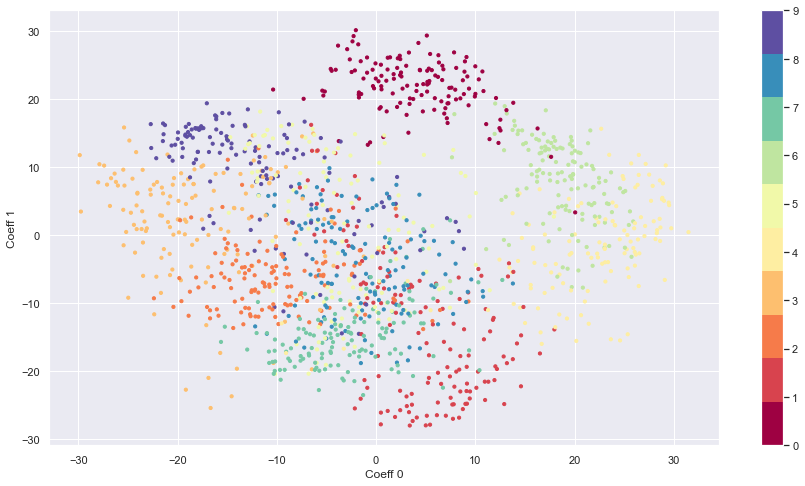

In [16]:
plt.figure(figsize=(15,8))
plt.scatter(coeff[:,0],coeff[:,1],c=y_train,cmap=plt.cm.get_cmap('Spectral', 10),s=10)
plt.colorbar()
plt.xlabel('Coeff 0')
plt.ylabel('Coeff 1')

### Now, Let us start with using logistic regression (when providing multiclass information, the logisticsRegression will automatically change to softmax regression)to do the classification. 
### Here we first use the first two coefficients 


In [17]:
import sklearn.linear_model as sl
import sklearn.metrics as sm
import sklearn.svm as ss

In [18]:
lr = sl.LogisticRegression(max_iter=1000000)
lr.fit(coeff[:,:2],y_train)
number_pred = lr.predict(coeff[:,:2])

### We are going to use "accuracy_score" as our metric this time (Check the accruracy score document for its definitation)

In [19]:
print('Accuracy_score')
print(sm.accuracy_score(y_train,number_pred))
#print(sm.accuracy_score(y_test,test_pred))

Accuracy_score
0.6013363028953229


### The color code shows the prediction results

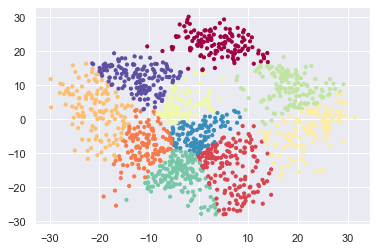

In [20]:
plt.scatter(coeff[:,0],coeff[:,1],c=number_pred,cmap=plt.cm.get_cmap('Spectral', 10),s=10)

### To do:
### 1. Write a code to do "for loop" to increase the number of coefficients used in the training and 
### plot x-axis (Number of coefficients) and y-axis (accuracy score) 
### [15 points] 

### 2. Apply the method to test data set, produce the same plot x-axis (Number of coefficients) and y-axis (accuracy score), 
# Showing the accuracy score from the training dataset and the test dataset in the same plot. 
### [15 points]

### Hint: in order to get the coefficients for the test dataset, you can directly do "coeff_test = pca.transform(X_test)"

### 3. Observe the two curves and answer the following questions:
### a. At which point the model starts to overfit the training dataset. 
### b. What is the best accuracy score we can get by using a logistic regression model. 
### [10 points]

### We now use support vector machines to do the classification

### 4. Use linear SVM and do the same analysis to obtain the accuracy score of the training dataset and the test data as a function of number of coefficients used in the training. 
### Again produce the plot with the two curves. 
### [15 points]

### 5. Use KERNEL SVM and do the same analysis to obtain the accuracy score of the training dataset and the test data as a function of number of coefficients used in the training. 
# You can explore the parameters 
### Again produce the plot with the two curves.
### [15 points]

### 6. What is the best accuracy score you can get for the test data set with SVM (both linear and Kernel)?
### [5 points]

### Finally, We use random forest to do the classification. 
### 7. Use Random forest and do the same analysis to obtain the accuracy score of the training dataset and the test data as a function of number of coefficients used in the training. 

### You need to also adjust the max_depth parameter and find the depth with best performance. 




# You can explore the parameters 
### (a) produce a plot with x-axis (max depth) and y-axis (number of coefficients) with colors indicating the acuracy score and find the best accuracy score and each number of coefficients.
### (b) Plot the number of coefficients vs best accuracy score for training and test dataset.
### [15 points]

### 8. (a.) Print the feature importance, and tell me which feature is the most important. 
### (b.) What is the best accuracy score you can get for the test data set with Random forest method.

### [5 points]

### 9. Compare the best accuracy scores from logistic regression, SVM, random forest and tell me
### which model works the best? 

### [5 points]
